<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2023-11-26 21:44:04--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2023-11-26 21:44:04--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.007s  

2023-11-26 21:44:05 (60.8 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2023-11-26 21:44:05--
Total wall clock time: 0.1s
Downloaded: 1 files, 418K in 0.007s (60.8 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("weight_height.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [4]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_clean = df.copy()
df_clean.dropna(subset=['Gender'], inplace=True)
df_clean.dropna(subset=['Height'], inplace=True)
df_clean.dropna(subset=['Weight'], inplace=True)

In [5]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
print(df_clean.dtypes)

Gender     object
Height    float64
Weight    float64
dtype: object


In [7]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = df_clean.copy()
df2['Weight'] = df2['Weight'] * 0.453592
df2['Height'] = df2['Height'] * 0.0254
df2['Gender'] = df2['Gender'].apply(lambda x: 'masculino' if x == 'Male' else 'femenino')
df2.columns = ['sexo', 'altura', 'peso']
df2.head()

,sexo,altura,peso
0,masculino,1.875714,109.720985
1,masculino,1.747060,73.622732
2,masculino,1.882397,96.497550
3,masculino,1.821967,99.809504
4,masculino,1.774998,93.598619


In [8]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df2.shape[0]

10000

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

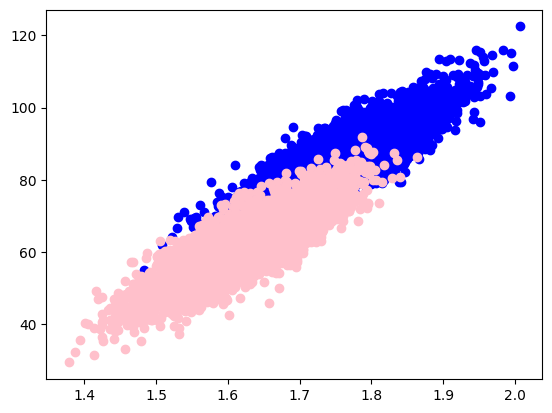

In [9]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
df2_masculino = df2[df2["sexo"] == "masculino"]
df2_femenino = df2[df2["sexo"] == "femenino"]
plt.scatter(df2_masculino['altura'], df2_masculino['peso'], color='blue', label='Masculino')
plt.scatter(df2_femenino['altura'], df2_femenino['peso'], color='pink', label='Femenino')
plt.show()

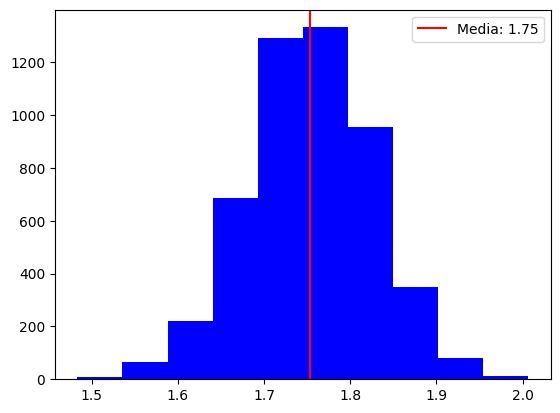

In [10]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
altura_hombres = df2[df2["sexo"] == "masculino"]["altura"]
plt.hist(altura_hombres, color='blue')
# Además, imprimir en pantalla el valor medio
media_altura_hombres = altura_hombres.mean()
plt.axvline(media_altura_hombres, color='red', label=f'Media: {media_altura_hombres:.2f}')
plt.legend()
plt.show()

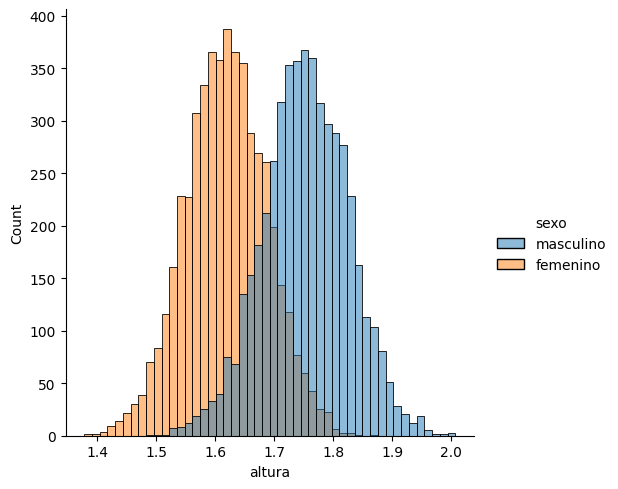

In [11]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2, x="altura", hue="sexo")
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [14]:
df2_masculino = df2[df2["sexo"] == "masculino"]
X = df2_masculino[['peso']].values
y = df2_masculino[['altura']].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
mse_list = []
grados_list = []
for degree in range(1, 10):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
  X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
  lr = LinearRegression()
  lr.fit(X_train_poly, y_train)
  y_hat = lr.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_hat)
  mse_list.append(mse)
  grados_list.append(degree)
  print(f"Grado de polinomio {degree}, error: {mse}")
print('Error mínimo:', min(mse_list))
print('Nivel óptimo:', mse_list.index(min(mse_list))+1)

Grado de polinomio 1, error: 0.001287463243428616
Grado de polinomio 2, error: 0.0012863704579846613
Grado de polinomio 3, error: 0.0012865928534695834
Grado de polinomio 4, error: 0.0012865235572400828
Grado de polinomio 5, error: 0.001285499887133028
Grado de polinomio 6, error: 0.001287634269599836
Grado de polinomio 7, error: 0.0012863608960188456
Grado de polinomio 8, error: 0.0012857345956007909
Grado de polinomio 9, error: 0.0012855679367031643
Error mínimo: 0.001285499887133028
Nivel óptimo: 5


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_hat = lr.predict(X_test_poly)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [19]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación: {score:.2f}")

Coeficiente de determinación: 0.75


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [27]:
peso = np.array([[80]])
peso_poly = poly.fit_transform(peso)
y_hat_prueba = lr.predict(peso_poly)
y_hat_prueba

array([[1.72043978]])

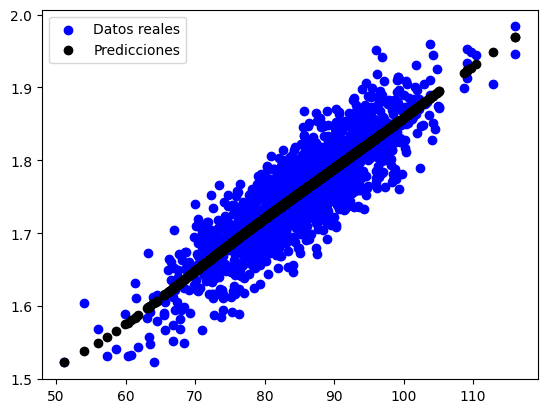

In [31]:
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_hat, color='black', label='Predicciones')
plt.legend()
plt.show()